In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   Tanggal  Curah Hujan (mm)  Penjualan A (pcs)  Penjualan B (pcs)
0        1               1.4                  0                507
1        2               1.2                 27                 61
2        3              15.2                458                367
3        4              13.4                 20                 21
4        5               7.7                  7                  0
          Tanggal  Curah Hujan (mm)  Penjualan A (pcs)  Penjualan B (pcs)
count  121.000000        121.000000         121.000000         121.000000
mean    15.123967         14.259504         131.834711         205.545455
std      9.218252         27.540254         141.596866         160.085134
min      1.000000          0.000000           0.000000           0.000000
25%      7.000000          0.000000           5.000000          80.000000
50%     15.000000          2.100000          52.000000         157.000000
75%     23.000000         16.400000         238.000000         324.000000
max   

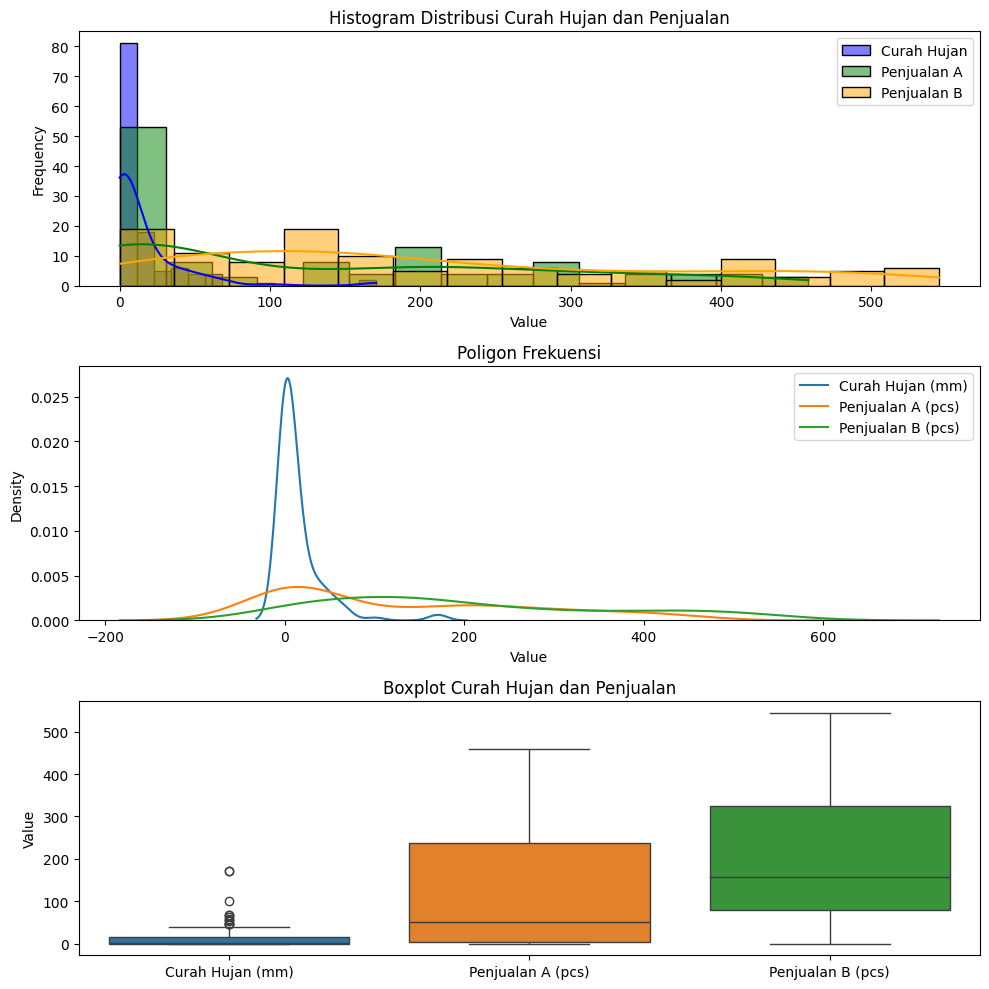


Boxplot memberikan gambaran persebaran data, termasuk kuartil pertama, median, kuartil ketiga, dan kemungkinan outlier di luar batas.
Perbedaan Boxplot dengan Histogram:
Boxplot menampilkan persebaran data per kuartil dan outlier sedangkan Histogram menunjukkan distribusi frekuensi secara keseluruhan.

Outlier di kolom Curah Hujan (mm):
     Tanggal  Curah Hujan (mm)  Penjualan A (pcs)  Penjualan B (pcs)
22        23              54.5                360                165
30        31              55.9                208                223
38         8              64.0                250                185
47        17              58.0                  0                137
60         2             100.6                181                230
76        18             170.6                301                273
81        23              45.5                197                101
82        24              68.0                300                 17
85        27              45.4         

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Step 1: Import Data
file_path = '/content/drive/MyDrive/Excel/Dataset.xlsx'
data = pd.read_excel(file_path)

# Step 2: Tinjauan awal data
print(data.head())
print(data.describe())
print(data.info())

# Step 3: Deskripsi Statistik - Mean, Median, Mode, Range, IQR, Variance, StdDev, Skewness, Kurtosis
for column in ['Penjualan A (pcs)', 'Penjualan B (pcs)']:
    print(f'\nStatistik untuk kolom {column}:')
    print(f'Mean: {data[column].mean()}')
    print(f'Median: {data[column].median()}')
    print(f'Mode: {data[column].mode()[0]}')
    print(f'Range: {data[column].max() - data[column].min()}')
    print(f'IQR: {data[column].quantile(0.75) - data[column].quantile(0.25)}')
    print(f'Variance: {data[column].var()}')
    print(f'Standard Deviation: {data[column].std()}')
    print(f'Skewness: {skew(data[column].dropna())}')
    print(f'Kurtosis: {kurtosis(data[column].dropna())}')

# Step 4: Visualisasi - Histogram, Frequency Polygon, dan Boxplot
plt.figure(figsize=(10, 10))

# Histogram
plt.subplot(3, 1, 1)
sns.histplot(data['Curah Hujan (mm)'], bins=15, kde=True, color='blue', label='Curah Hujan')
sns.histplot(data['Penjualan A (pcs)'], bins=15, kde=True, color='green', label='Penjualan A')
sns.histplot(data['Penjualan B (pcs)'], bins=15, kde=True, color='orange', label='Penjualan B')
plt.legend()
plt.title('Histogram Distribusi Curah Hujan dan Penjualan')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Poligon Frekuensi
plt.subplot(3, 1, 2)
for column in ['Curah Hujan (mm)', 'Penjualan A (pcs)', 'Penjualan B (pcs)']:
    sns.kdeplot(data[column], label=column)
plt.title('Poligon Frekuensi')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Boxplot untuk menunjukkan persebaran data dan outlier
plt.subplot(3, 1, 3)
sns.boxplot(data=data[['Curah Hujan (mm)', 'Penjualan A (pcs)', 'Penjualan B (pcs)']])
plt.title('Boxplot Curah Hujan dan Penjualan')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Step 5: Analisis Boxplot
print("\nBoxplot memberikan gambaran persebaran data, termasuk kuartil pertama, median, kuartil ketiga, dan kemungkinan outlier di luar batas.")
print("Perbedaan Boxplot dengan Histogram:")
print("Boxplot menampilkan persebaran data per kuartil dan outlier sedangkan Histogram menunjukkan distribusi frekuensi secara keseluruhan.")

# Step 6: Interpretasi Outlier
for column in ['Curah Hujan (mm)', 'Penjualan A (pcs)', 'Penjualan B (pcs)']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\nOutlier di kolom {column}:")
    print(outliers)

# Step 7: Kesimpulan
print("\nKesimpulan:")
print("1. Karakteristik persebaran data yang ditemukan dari analisis statistik menunjukkan perbedaan variasi.")
print("2. Outlier ditemukan dalam data, terutama pada penjualan dan curah hujan.")
print("3. Distribusi data dianalisis dengan skewness dan kurtosis untuk memeriksa kemiringan atau distribusi miring.")